In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
data=pd.read_csv("/home/data/data.csv")
print(data)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


In [14]:
stats=data.describe()
print(stats)

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [16]:
null_rows = data[data.isnull().any(axis=1)]

# Print the rows with null values
print("Rows with null values:")
print(null_rows)

# Replace null values with the mean for each row
def replace_null_with_mean(row):
    row_mean = row.mean()
    return row.fillna(row_mean)

df_filled = data.apply(replace_null_with_mean, axis=1)

# Display the DataFrame after replacing null values with mean for each row
print("DataFrame after replacing null values with mean for each row:")
print(df_filled)

Rows with null values:
     Duration  Pulse  Maxpulse  Calories
17         45     90       112       NaN
27         60    103       132       NaN
91         45    107       137       NaN
118        60    105       125       NaN
141        60     97       127       NaN
DataFrame after replacing null values with mean for each row:
     Duration  Pulse  Maxpulse  Calories
0        60.0  110.0     130.0     409.1
1        60.0  117.0     145.0     479.0
2        60.0  103.0     135.0     340.0
3        45.0  109.0     175.0     282.4
4        45.0  117.0     148.0     406.0
..        ...    ...       ...       ...
164      60.0  105.0     140.0     290.8
165      60.0  110.0     145.0     300.0
166      60.0  115.0     145.0     310.2
167      75.0  120.0     150.0     320.4
168      75.0  125.0     150.0     330.4

[169 rows x 4 columns]


In [18]:

# Select at least two columns (replace 'column1' and 'column2' with your actual column names)
selected_columns = ['Duration', 'Pulse']

# Aggregate the data using min, max, count, and mean for the selected columns
aggregated_data = data[selected_columns].agg({
    'Duration': ['min', 'max', 'count', 'mean'],
    'Pulse': ['min', 'max', 'count', 'mean']
})

# Display the aggregated data
print(aggregated_data)

         Duration       Pulse
min     15.000000   80.000000
max    300.000000  159.000000
count  169.000000  169.000000
mean    63.846154  107.461538


In [20]:
filtered_df = data[(data['Calories'] >= 500) & (data['Calories'] <= 1000)]

# Display the filtered DataFrame
print("DataFrame with calories between 500 and 1000:")
print(filtered_df)

DataFrame with calories between 500 and 1000:
     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [23]:
filtered_data = data[(data['Calories'] > 500) & (data['Pulse'] < 100)]

# Display the filtered DataFrame
print("DataFrame with calories > 500 and pulse < 100:")
print(filtered_data)

DataFrame with calories > 500 and pulse < 100:
     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [25]:
df_modified = data.drop(columns=['Maxpulse'])

# Display the modified DataFrame
print("DataFrame 'df_modified' without 'Maxpulse' column:")
print(df_modified)

DataFrame 'df_modified' without 'Maxpulse' column:
     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [28]:
filtered_df.drop(columns=['Maxpulse'], inplace=True)

# Display the modified DataFrame
print("DataFrame 'df' without 'Maxpulse' column:")
print(data)

DataFrame 'df' without 'Maxpulse' column:
     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


<ipython-input-28-ef60b49a33dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['Maxpulse'], inplace=True)


In [31]:
df_filled['Calories'] = df_filled['Calories'].astype(int)
print(df_filled)

     Duration  Pulse  Maxpulse  Calories
0        60.0  110.0     130.0       409
1        60.0  117.0     145.0       479
2        60.0  103.0     135.0       340
3        45.0  109.0     175.0       282
4        45.0  117.0     148.0       406
..        ...    ...       ...       ...
164      60.0  105.0     140.0       290
165      60.0  110.0     145.0       300
166      60.0  115.0     145.0       310
167      75.0  120.0     150.0       320
168      75.0  125.0     150.0       330

[169 rows x 4 columns]


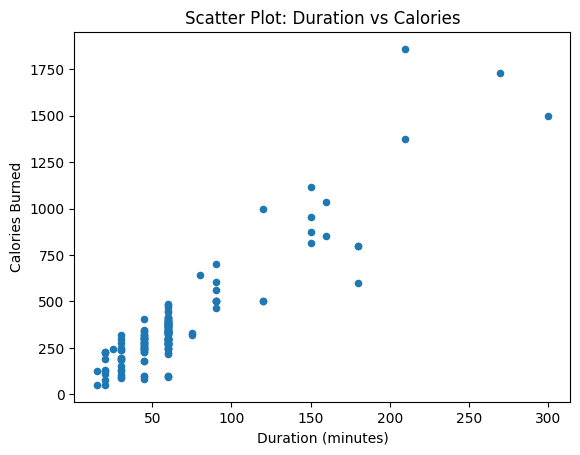

In [34]:
df_filled.plot.scatter(x='Duration', y='Calories', title='Scatter Plot: Duration vs Calories')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.show()